<a href="https://colab.research.google.com/github/Ganesh9100/deep_learning_raj/blob/master/ANN_PART_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras 
from keras.models import Sequential #whether you create ann,cnn,nn,rnn u have to import this because it is responsible for creating nn
from keras.layers import Dense # 
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout#regulariztion aparameter
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 


Using TensorFlow backend.


**This is the dataset from bank , to predict whether the customer will exit the bank in future or not , so that the bank can not leave them they can hold by providing some benefitial**

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
# I dont want row no cust ID and sur name bcz they are not going to play a role , here 
x=df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [4]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [0]:
#Create dummy variables
geography=pd.get_dummies(x["Geography"],drop_first=False)#drop first is the no of columns u want , if it is false , it will take column= no of categories , if it is true it will take column= no of categories - 1
gender=pd.get_dummies(x['Gender'],drop_first=True)# her ewe have m / f , so turning to 1 column , this drop_first true means it will reduce the column ie 2 categories to 1 

In [7]:
geography.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [8]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [0]:
## Concatenate the Data Frames
x=pd.concat([x,geography,gender],axis=1)


In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [0]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [12]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [0]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
# now we do feature scaling because , to reudce computation 
# the feature value are higher and so we reduvce to one commone scale 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Initialising the ANN
classifier = Sequential()# this is empty NN currently

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 12))
## first hidden layer 
# units=6 is the no of hidden unit in first hidden layer 
#kernel_initializer= 'he_uniform' it is the weight initialization - root of 6/fan_in
# no of input_dim = 12 ie 12 features 


In [0]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))
# no of hidden unit in 2nd layer is 6 

In [0]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))
# so here the waight initilization changes to glorotuniform or xavier ie init= 'he_uniform' it is the weight initialization - root of 6/fan_in+fan_out
#no of output unit is 1 


In [19]:
#summary 
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [0]:
# no of parameter 78 
#bcz , 6 x 12 + 6=78
#( no of hidden unit x no of input unit + no of hidden unit ( bias))

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
#prefer using binary_crossentropy if you use sigmoid in o/p unit oor if hte o/p is binary categorical 
# if u have more than one category then prefer using " CATEGORICAL_CROSSENTROPY"

In [25]:
#Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 194us/step - loss: 0.4753 - accuracy: 0.7960 - val_loss: 0.4588 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 135us/step - loss: 0.4512 - accuracy: 0.7962 - val_loss: 0.4482 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 133us/step - loss: 0.4417 - accuracy: 0.7962 - val_loss: 0.4431 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 131us/step - loss: 0.4359 - accuracy: 0.7962 - val_loss: 0.4400 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 134us/step - loss: 0.4320 - accuracy: 0.7962 - val_loss: 0.4371 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 133us/step - loss: 0.4289 - accuracy: 0.8009 - val_loss: 0.4348 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 135us/step

ONE EPOCH IS ONE FULL ACCESS TO DATA POINTS 
SO 
IN ONE EPOCH , 10 DATA POINTS ARE SELECTED AND COMPUTED LOSS AND BACKPROB TO REDUCE THEN ANOTHER 10 IS SELECTED COMPUTED LOSS AND REDUCE IT 
UNTILL ALL THE DATA POINT ARE ACCESSED 

In [0]:
# HERE YOU CAN SEE IT HAS LOW BIAS AND LOW VARIANCE 
# BIAS = ERROR IS TRAIN DATA 
# VARIANCE = ERROR IN TEST DATA 
# SO BY SEEING THE VAL_LOSS AND LOSS , BOTH ARE LOW 

# AND , WE GOT BOTH THE VAL AND ACC AS APPOX EQUAL 

# AND BY SELECTING CRT WEIGHT INIT , THE OPTIMIZER THIS IS THE GOOD RESULT 


In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)

In [30]:
y_pred

array([[0.3144279 ],
       [0.28220296],
       [0.19309878],
       ...,
       [0.3326072 ],
       [0.24662223],
       [0.1795983 ]], dtype=float32)

In [0]:
# so we use sigmoid the y_pred will be 0 - 1 
# i use one condition to know it is 0 or 1 
y_pred=y_pred>0.5 # true if > 0.5 else false 
# so true means 1 false means 0 


In [32]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [34]:
cm

array([[1502,   93],
       [ 190,  215]])

In [0]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [36]:
score  # the accuracy is 0.85 but we can try to increase it 

0.8585

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


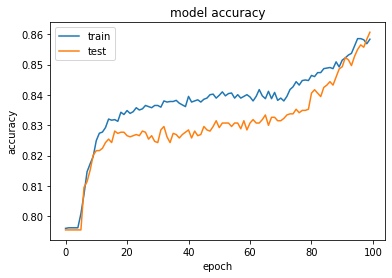

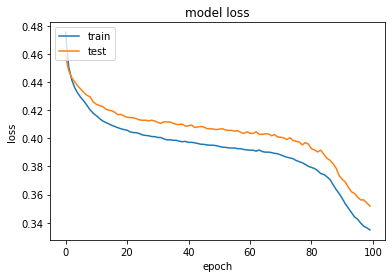

In [72]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# INCREASING THE ACCURACY IF POSSIBLE 
# Initialising the ANN
classifier_new = Sequential()# this is empty NN currently

In [0]:
classifier_new.add(Dense(units=20, kernel_initializer = 'he_normal',activation='relu',input_dim = 12))
classifier_new.add(Dropout(0.3))
classifier_new.add(Dense(units=20, kernel_initializer='he_normal',activation='relu'))
classifier_new.add(Dropout(0.2))
classifier_new.add(Dense(units=15, kernel_initializer='he_normal',activation='relu'))
classifier_new.add(Dropout(0.3))
classifier_new.add(Dense(units=10, kernel_initializer='he_normal',activation='relu'))
classifier_new.add(Dropout(0.1))
classifier_new.add(Dense(units=1, kernel_initializer='glorot_normal',activation='sigmoid'))

In [64]:
classifier_new.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 20)                260       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 15)                315       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)               

In [0]:
# Compiling the ANN
classifier_new.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [66]:
#Fitting the ANN to the Training set
model_history_new=classifier_new.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 213us/step - loss: 0.6100 - accuracy: 0.7313 - val_loss: 0.5104 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 171us/step - loss: 0.5118 - accuracy: 0.7925 - val_loss: 0.4788 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 169us/step - loss: 0.4884 - accuracy: 0.7981 - val_loss: 0.4560 - val_accuracy: 0.7974
Epoch 4/100
5359/5359 [==============================] - 1s 166us/step - loss: 0.4796 - accuracy: 0.7970 - val_loss: 0.4490 - val_accuracy: 0.7948
Epoch 5/100
5359/5359 [==============================] - 1s 171us/step - loss: 0.4615 - accuracy: 0.8054 - val_loss: 0.4361 - val_accuracy: 0.8027
Epoch 6/100
5359/5359 [==============================] - 1s 171us/step - loss: 0.4458 - accuracy: 0.8072 - val_loss: 0.4277 - val_accuracy: 0.8054
Epoch 7/100
5359/5359 [==============================] - 1s 173us/step

In [67]:
y_pred = classifier_new.predict(X_test)

acc=accuracy_score(y_pred,y_test)

ValueError: ignored

In [0]:
y_pred = classifier_new.predict(X_test)
y_pred=y_pred>0.5
acc=accuracy_score(y_pred,y_test)


In [69]:
acc

0.8665

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


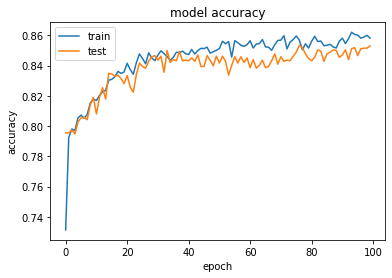

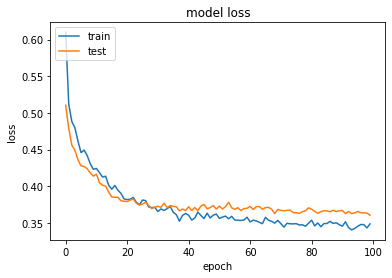

In [76]:
# list all data in history

print(model_history_new.history.keys())

#print(model_history_new.history)
# summarize history for accuracy
plt.plot(model_history_new.history['accuracy'])
plt.plot(model_history_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history_new.history['loss'])
plt.plot(model_history_new.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()